# COVID-19 Prediction using CNN

# Importing necessary libraries

In [21]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation,GlobalMaxPooling2D,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from glob import glob
import os
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# input data files

X_train = 'C:/Users/saipr/JN/NTI/xray_dataset_covid19/train'
X_test = 'C:/Users/saipr/JN/NTI/xray_dataset_covid19/test'

In [23]:
# resize all images to standard size as 224*224 as VGC16 works on this size

IMAGE_SIZE = [224, 224]

In [24]:
# define inception CNN

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [25]:
# useful for getting number of classes
folders=glob('C:/Users/saipr/JN/NTI/xray_dataset_covid19/train/*') ## * have to be included this will decide no of folders
folders

['C:/Users/saipr/JN/NTI/xray_dataset_covid19/train\\NORMAL',
 'C:/Users/saipr/JN/NTI/xray_dataset_covid19/train\\PNEUMONIA']

In [26]:
#our model and layers

x = Flatten()(inception.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x) ## we have 2 features normal and phenoma /instead of 2 we can provide (len(folders))
x = Dropout(0.5)(prediction)

In [27]:
prediction

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_625>

In [28]:
# create a model object

model = Model(inputs=inception.input, outputs=prediction) 

In [29]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_94 (Conv2D)            │ (None, 111, 111, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_94        │ (None, 111, 111, 32)      │              96 │ conv2d_94[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_94 (Activation)    │ (None, 111, 111, 32)      │               0 │ batch_normalization_94[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_95 (Conv2D)            │ (None, 109, 109, 32)      │           9,216 │ activation_94[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_95        │ (None, 109, 109, 32)      │              96 │ conv2d_95[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_95 (Activation)    │ (None, 109, 109, 32)      │               0 │ batch_normalization_95[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_96 (Conv2D)            │ (None, 109, 109, 64)      │          18,432 │ activation_95[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_96        │ (None, 109, 109, 64)      │             192 │ conv2d_96[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_96 (Activation)    │ (None, 109, 109, 64)      │               0 │ batch_normalization_96[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 54, 54, 64)        │               0 │ activation_96[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_97 (Conv2D)            │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_97        │ (None, 54, 54, 80)        │             240 │ conv2d_97[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_97 (Activation)    │ (None, 54, 54, 80)        │               0 │ batch_normalization_97[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_98 (Conv2D)            │ (None, 52, 52, 192)       │         138,24

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 21,870,754 (83.43 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [30]:
# cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/saipr/JN/NTI/xray_dataset_covid19/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/saipr/JN/NTI/xray_dataset_covid19/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [33]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9310 - loss: 0.2262 - val_accuracy: 0.7750 - val_loss: 195.4386
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9837 - loss: 0.0302 - val_accuracy: 0.8500 - val_loss: 88.9847
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9869 - loss: 0.0376 - val_accuracy: 0.9000 - val_loss: 45.7250
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0212 - val_accuracy: 0.8750 - val_loss: 23.6384
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9977 - loss: 0.0111 - val_accuracy: 0.8750 - val_loss: 8.2438
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.8750 - val_loss: 7.4849
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9977 - loss: 0.0164 - val_accuracy: 0.8750 - val_loss: 3.7559
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9977 - loss: 0.0099 - val_accuracy: 0.9000 - val_loss: 1.2641
Epo

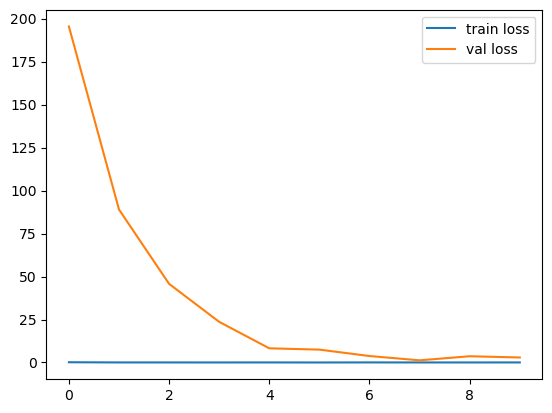

<Figure size 640x480 with 0 Axes>

In [34]:
# visualization of loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

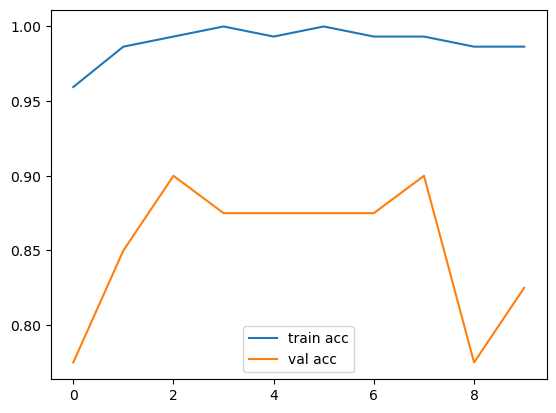

<Figure size 640x480 with 0 Axes>

In [35]:
# visualization of accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
## saving the model
model.save('covid19xray.h5')